<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_0_1_0_9_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n20.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.837167,47.557032,90.310034,-0.386465,207.317767,207.688080,-0.370313
1,0.0,1.0,75.674532,91.339845,76.405294,-0.139933,253.279738,253.249903,0.029835
2,0.0,2.0,28.209482,93.921958,86.932449,0.261898,219.325787,218.940445,0.385342
3,0.0,3.0,44.591013,84.299018,62.251748,-0.535988,200.605791,201.040851,-0.435060
4,0.0,4.0,30.271510,53.775244,26.158386,-0.303541,119.901599,120.238217,-0.336618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,46.754826,93.334004,61.622004,0.478460,212.189294,211.878528,0.310766
119996,999.0,116.0,34.189810,32.265831,98.922579,-0.652153,174.726068,175.396032,-0.669965
119997,999.0,117.0,42.158145,95.077127,44.547026,0.597034,192.379332,191.872218,0.507114
119998,999.0,118.0,32.727838,37.332215,76.422779,0.485877,156.968709,156.411666,0.557043


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.837167,47.557032,90.310034,-0.386465,207.317767,207.688080,-0.370313
1,0.0,1.0,75.674532,91.339845,76.405294,-0.139933,253.279738,253.249903,0.029835
2,0.0,2.0,28.209482,93.921958,86.932449,0.261898,219.325787,218.940445,0.385342
3,0.0,3.0,44.591013,84.299018,62.251748,-0.535988,200.605791,201.040851,-0.435060
4,0.0,4.0,30.271510,53.775244,26.158386,-0.303541,119.901599,120.238217,-0.336618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,46.754826,93.334004,61.622004,0.478460,212.189294,211.878528,0.310766
119996,999.0,116.0,34.189810,32.265831,98.922579,-0.652153,174.726068,175.396032,-0.669965
119997,999.0,117.0,42.158145,95.077127,44.547026,0.597034,192.379332,191.872218,0.507114
119998,999.0,118.0,32.727838,37.332215,76.422779,0.485877,156.968709,156.411666,0.557043


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    59.837167  47.557032  90.310034  ...  207.317767  207.688080 -0.370313
      1.0    75.674532  91.339845  76.405294  ...  253.279738  253.249903  0.029835
      2.0    28.209482  93.921958  86.932449  ...  219.325787  218.940445  0.385342
      3.0    44.591013  84.299018  62.251748  ...  200.605791  201.040851 -0.435060
      4.0    30.271510  53.775244  26.158386  ...  119.901599  120.238217 -0.336618
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  46.754826  93.334004  61.622004  ...  212.189294  211.878528  0.310766
      116.0  34.189810  32.265831  98.922579  ...  174.726068  175.396032 -0.669965
      117.0  42.158145  95.077127  44.547026  ...  192.379332  191.872218  0.507114
      118.0  32.727838  37.332215  76.422779  ...  156.968709  156.411666  0.557043
      119.0  21.694145  23.282954  94.055823  ...  149.227695  148.979796  0.247899

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    59.837167  47.557032  90.310034  ...  207.317767  207.688080 -0.370313
      1.0    75.674532  91.339845  76.405294  ...  253.279738  253.249903  0.029835
      2.0    28.209482  93.921958  86.932449  ...  219.325787  218.940445  0.385342
      3.0    44.591013  84.299018  62.251748  ...  200.605791  201.040851 -0.435060
      4.0    30.271510  53.775244  26.158386  ...  119.901599  120.238217 -0.336618
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  46.754826  93.334004  61.622004  ...  212.189294  211.878528  0.310766
      116.0  34.189810  32.265831  98.922579  ...  174.726068  175.396032 -0.669965
      117.0  42.158145  95.077127  44.547026  ...  192.379332  191.872218  0.507114
      118.0  32.727838  37.332215  76.422779  ...  156.968709  156.411666  0.557043
      119.0  21.694145  23.282954  94.055823  ...  149.227695  148.979796  0.247899

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.837167,47.557032,90.310034,-0.386465,207.317767,207.688080,-0.370313
1,0.0,1.0,75.674532,91.339845,76.405294,-0.139933,253.279738,253.249903,0.029835
2,0.0,2.0,28.209482,93.921958,86.932449,0.261898,219.325787,218.940445,0.385342
3,0.0,3.0,44.591013,84.299018,62.251748,-0.535988,200.605791,201.040851,-0.435060
4,0.0,4.0,30.271510,53.775244,26.158386,-0.303541,119.901599,120.238217,-0.336618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,46.754826,93.334004,61.622004,0.478460,212.189294,211.878528,0.310766
119996,999.0,116.0,34.189810,32.265831,98.922579,-0.652153,174.726068,175.396032,-0.669965
119997,999.0,117.0,42.158145,95.077127,44.547026,0.597034,192.379332,191.872218,0.507114
119998,999.0,118.0,32.727838,37.332215,76.422779,0.485877,156.968709,156.411666,0.557043


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    59.837167  47.557032  90.310034  ...  207.317767  207.688080 -0.370313
      1.0    75.674532  91.339845  76.405294  ...  253.279738  253.249903  0.029835
      2.0    28.209482  93.921958  86.932449  ...  219.325787  218.940445  0.385342
      3.0    44.591013  84.299018  62.251748  ...  200.605791  201.040851 -0.435060
      4.0    30.271510  53.775244  26.158386  ...  119.901599  120.238217 -0.336618
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  46.754826  93.334004  61.622004  ...  212.189294  211.878528  0.310766
      116.0  34.189810  32.265831  98.922579  ...  174.726068  175.396032 -0.669965
      117.0  42.158145  95.077127  44.547026  ...  192.379332  191.872218  0.507114
      118.0  32.727838  37.332215  76.422779  ...  156.968709  156.411666  0.557043
      119.0  21.694145  23.282954  94.055823  ...  149.227695  148.979796  0.247899

[120000 rows x 7 columns]

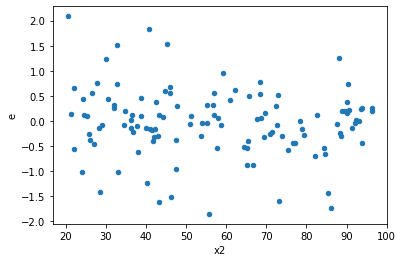

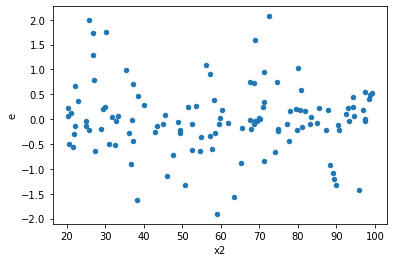

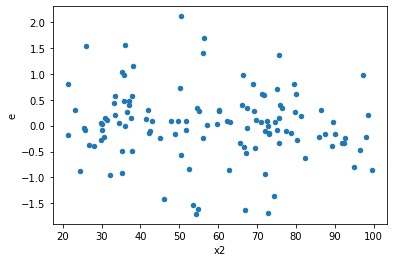

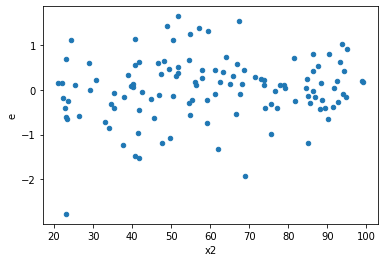

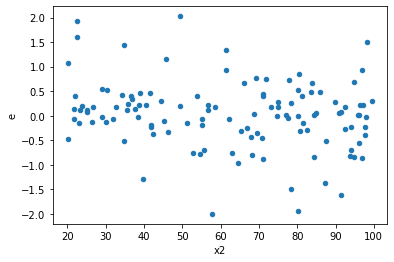

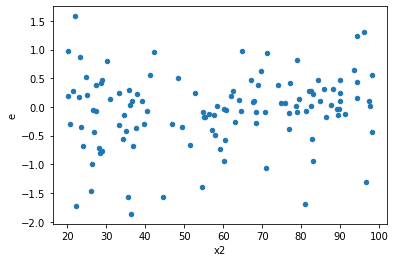

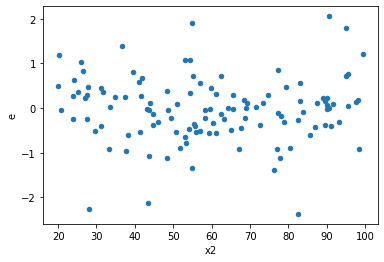

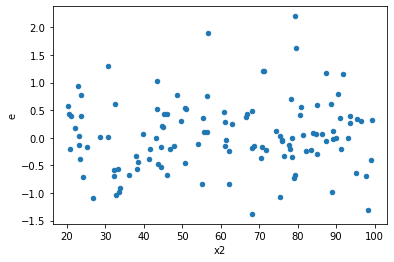

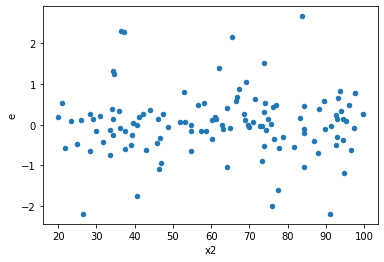

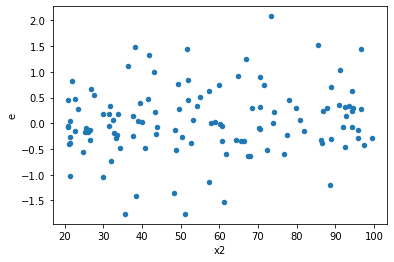

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,45.0,45.0,17.98251203009037,19.818511797168718,0.39961137844645267,0.44041137327041596,1.102099181916639,0.7457828808368769,0.6271085595815615,0.37289144041843847,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,15.466060214206745,20.18661601620022,0.3436902269823721,0.4485914670266715,1.305220317043463,0.37497760445687955,0.8125111977715602,0.18748880222843978,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,28.977332636257202,29.90124885301841,0.64394072525016,0.6644721967337424,1.0318841015616869,0.9166236052989987,0.5416881973505007,0.45831180264949933,Reject001=1 : Homoscedasticity
9.0,45.0,45.0,16.678576339629664,17.414126370992193,0.3706350297695481,0.3869805860220487,1.0441014878239219,0.8855442791701265,0.5572278604149368,0.44277213958506323,Reject001=1 : Homoscedasticity
10.0,45.0,45.0,13.935101877178457,26.11467683424844,0.3096689306039657,0.5803261518721875,1.8740212353249095,0.0376868621974249,0.9811565689012876,0.01884343109871245,Reject001=1 : Homoscedasticity
13.0,45.0,45.0,24.653558719112688,25.42328894741314,0.5478568604247264,0.5649619766091809,1.0312218709302896,0.91832288152326,0.54083855923837,0.45916144076163,Reject001=1 : Homoscedasticity
14.0,45.0,45.0,21.496200025432827,24.03971783807644,0.47769333389850727,0.5342159519572542,1.1183240670273955,0.7092089113304683,0.6453955443347659,0.35460445566523413,Reject001=1 : Homoscedasticity
16.0,45.0,45.0,16.167923761696393,27.922357085578405,0.35928719470436427,0.6204968241239646,1.727021817837215,0.07007325726670399,0.964963371366648,0.035036628633351996,Reject001=1 : Homoscedasticity
17.0,45.0,45.0,18.524407332382665,29.465076068554424,0.41165349627517034,0.6547794681900984,1.5906083007064031,0.12325720255350792,0.938371398723246,0.06162860127675396,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,25.93094253953076,14.436423441554357,0.576243167545128,0.32080940981231904,0.5567257503095602,0.05238750882546287,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,20.926675329951376,16.91677807927325,0.465037229554475,0.3759284017616278,0.8083834537759113,0.4784085503788665,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,19.969096445456426,14.586467615558036,0.4437576987879206,0.32414372479017856,0.7304520590302871,0.2957780286407324,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,26.335981737271176,15.25814419017808,0.5852440386060261,0.3390698708928462,0.5793649290310855,0.07036541578463218,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,17.98251203009037,19.818511797168718,0.39961137844645267,0.44041137327041596,1.102099181916639,0.7457828808368769,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,24.607509469456552,13.954631101503653,0.5468335437657011,0.31010291336674783,0.5670883158177582,0.060155360127330235,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,23.819050088576233,21.168066923355624,0.529312224190583,0.47040148718568053,0.8887032373095333,0.6939863185441214,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,15.466060214206745,20.18661601620022,0.3436902269823721,0.4485914670266715,1.305220317043463,0.37497760445687955,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,28.977332636257202,29.90124885301841,0.64394072525016,0.6644721967337424,1.0318841015616869,0.9166236052989987,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      947
Reject001=0 : Heteroscedasticity     53
Name: Result_test, dtype: int64